In [1]:
!nvidia-smi

Fri Apr  8 06:05:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   39C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
%cd /yolov5

!conda install glib=2.51.0 -y
!pip install -r requirements.txt wandb

/home/studio-lab-user/sagemaker-studiolab-notebooks/flexible-yolov5
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

  Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
  Using cached coremltools-5.2.0-cp39-none-manylinux1_x86_64.whl (1.6 MB)
  Using cached onnx-1.11.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (12.8 MB)


### Install thư viện Albumentation khi sử dụng các phương pháp Data augmentations.

In [2]:
!pip install -U albumentations
!pip install opencv-python-headless==4.5.2.52

     |████████████████████████████████| 38.2 MB 3.2 MB/s eta 0:00:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


## Train
- Thay đổi backbone bằng các file config. Ví dụ: model_resnet.yaml, model_shufflenet.yaml,...
- Thay đổi version của backbone thủ công trong file config

In [ ]:
%cd /yolov5

!python scripts/train.py  --batch 16 --epochs 100 --img 640 --data configs/data.yaml --cfg configs/model_resnet.yaml

# !python scripts/train.py  --batch 16 --epochs 100 --img 640 --data configs/data.yaml --weights runs/train/exp/weights/last.pt --cfg configs/model_resnet.yaml

# !python scripts/train.py

/home/studio-lab-user/sagemaker-studiolab-notebooks/flexible-yolov5
github: fatal: ambiguous argument 'main..origin/master': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'
Command 'git rev-list main..origin/master --count' returned non-zero exit status 128.
YOLOv5 d5e494a torch 1.11.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(weights='runs/train/exp/weights/last.pt', cfg='configs/model_resnet.yaml', data='configs/data.yaml', hyp='configs/hyp.scratch.yaml', epochs=300, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, log_imgs=16, log_artifacts=False, workers=8, project='runs/train', name='exp', exist_ok=False, quad=False, linear_lr=False, world_size=1, global_rank=-1

## Test

In [ ]:
import time

start = time.time()

%cd /yolov5

!python scripts/eval.py --img 640 --conf 0.5 --iou 0.45 --data configs/data.yaml --weights runs/train/exp/weights/last.pt

end = time.time()
print(end - start)

/home/studio-lab-user/sagemaker-studiolab-notebooks/flexible-yolov5
Namespace(weights=['runs/train/exp26/weights/last.pt'], data='configs/data.yaml', batch_size=32, img_size=640, conf_thres=0.5, iou_thres=0.45, task='val', device='', single_cls=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False)
YOLOv5 d5e494a torch 1.11.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 378 layers, 46845585 parameters, 0 gradients, 136.7 GFLOPS
val: Scanning 'data/labels/val.cache' for images and labels... 15872 found, 50 m
               Class      Images  

In [ ]:
# 0.713       0.686       0.368 last25

# 0.656       0.64        0.357 turn4

# 0.703       0.814       0.0341 turn 2

## Detect

In [1]:
%cd /yolov5

from IPython.display import Image, clear_output
!python scripts/detector.py --img 640 --conf 0.5 --iou 0.45 --source data/images/failure --weights runs/train/exp/weights/last.pt --save-txt

/home/studio-lab-user/sagemaker-studiolab-notebooks/flexible-yolov5
Fusing layers... 
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1639836241_frame_1343625.jpg
1639836241_frame_581650.jpg
1639836241_frame_655375.jpg
1639905201_frame_33750.jpg
1639905201_frame_35800.jpg
1639905201_frame_38330.jpg
1639905201_frame_49130.jpg
1639905201_frame_51620.jpg
1639925921_frame_23460.jpg
1639926012_frame_3890.jpg
1639926015_frame_6670.jpg
1639926197_frame_37530.jpg
1639929646_frame_68420.jpg
1639930848_frame_4220.jpg
1639933505_frame_111790.jpg
1639933659_frame_53370.jpg
1639958699_frame_100.jpg
1639958699_frame_12850.jpg
1639958699_frame_1790.jpg
1639958699_frame_1800.jpg
1639958699_frame_24250.jpg
163995

## FPR

In [2]:
import os
%cd /yolov5

total = len(os.listdir('runs/detect/exp'))
print('Total:', total)
FP = len(os.listdir('runs/detect/exp/labels'))
print('Fail:', FP)
print('FPR:', round(FP/total, 4))

/home/studio-lab-user/sagemaker-studiolab-notebooks/flexible-yolov5
Total: 3698
Fail: 122
FPR: 0.033


In [ ]:
# Total: 3697
# Fail: 122
# FPR: 0.033  exp14

## Show detected images

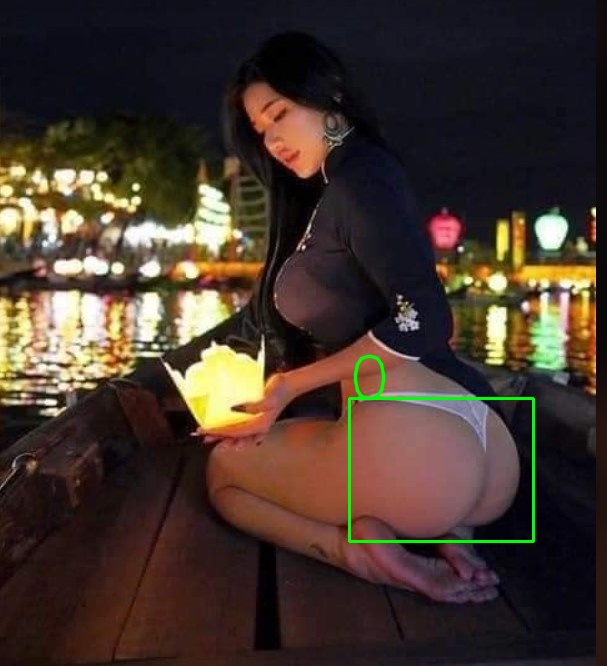

In [8]:
Image(filename='runs/detect/exp/Screen.jpg', width=800)

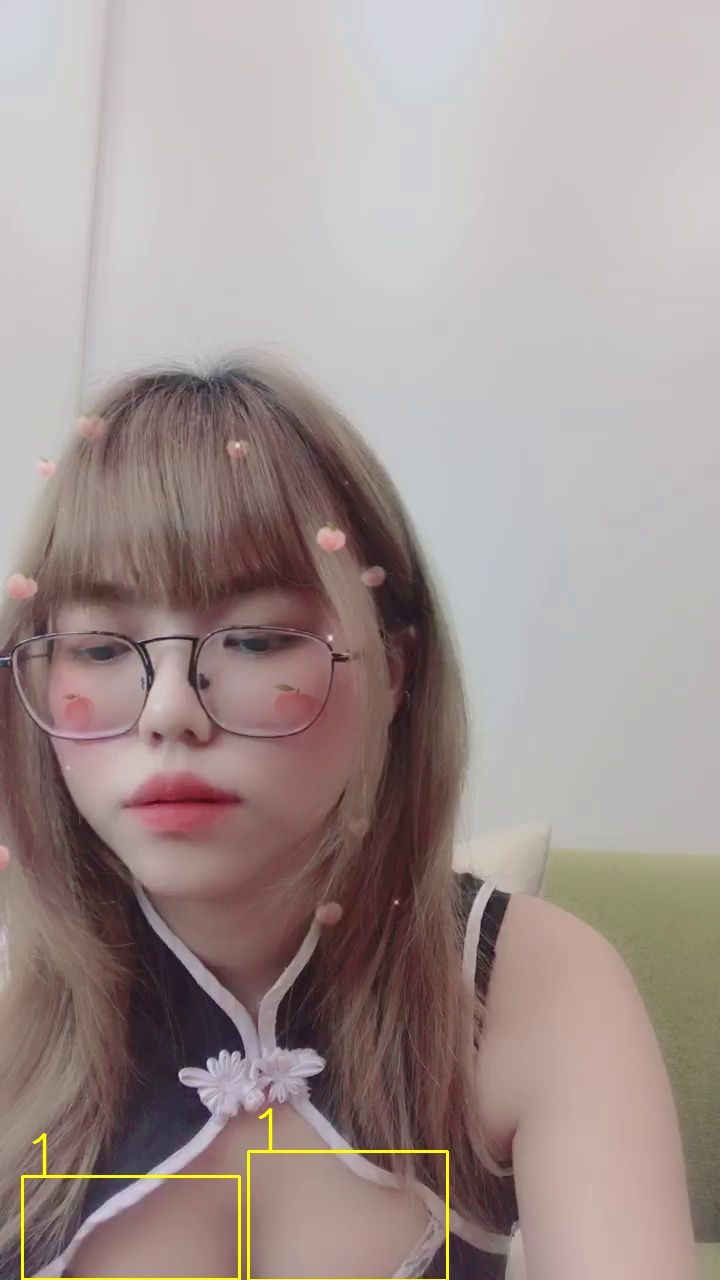

In [23]:
Image(filename='runs/detect/exp/1639962118_frame_122820.jpg', width=800)